# **Assignment 1: Understanding Data Worked Example**

**Name: Shreyas Madhusudan Dasari**

**NUID: 002743612**

# **Abstract:**

The star dataset is a thorough compendium of star-related astronomical data. The temperature, brightness, radius, and other properties of stars are among the traits and features in this dataset that describe them. This dataset's main goal is to make it easier to explore and analyse star attributes so that scientists, astronomers, and data enthusiasts can learn more about the stellar universe.

# **Aim:**

This dataset aims to serve as a useful tool for people with an interest in astronomy, astrophysics, and data analysis. It provides a chance to research and evaluate the characteristics of stars, how they are categorised, and the links between different stellar parameters. This information can be used by researchers to do experiments, create forecasting models, and investigate the fascinating universe of stars.


# **About Dataset**

Dataset Info:

This is a dataset consisting of several features of stars.

Some of them are:

1. Absolute Temperature (in K)
2. Relative Luminosity (L/Lo)
3. Relative Radius (R/Ro)
4. Absolute Magnitude (Mv)
5. Star Color (white,Red,Blue,Yellow,yellow-orange etc)
6. Spectral Class (O,B,A,F,G,K,,M)
7. Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**
8. Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
9. Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

**Purpose:**

The dataset's goal is to demonstrate that stars in celestial space adhere to a particular graph known as the Hertzsprung-Russell Diagram, or HR-Diagram, which allows us to categorise them by graphing their properties in accordance with that graph.

![Star Exploration](https://cdn.mos.cms.futurecdn.net/ApcuFeebra9um9oUmbTquD-1920-80.jpg.webp)

# **Importing Required Libraries and Dependencies**

In [92]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [93]:
# Reading Dataset
df = pd.read_csv('https://raw.githubusercontent.com/ShreyasDasari/Advanced-Data-Science-and-Architecture/main/Datasets/Startype.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [94]:
# Checking shape of the dataset
df.shape

(240, 7)

In [95]:
# Checking how many unique values of Star color are present
df['Star color'].nunique()

19

In [96]:
# Checking unique values of Spectral Class
df['Spectral Class'].nunique()

7

In [97]:
# Checking Datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [98]:
# Checking if the dataset has null values
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [99]:
# Printing dataset description
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [100]:
# Checking correlation
df.corr()

<ipython-input-100-bb2cd035b4c4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


<ipython-input-101-ba0173a2bf4c>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



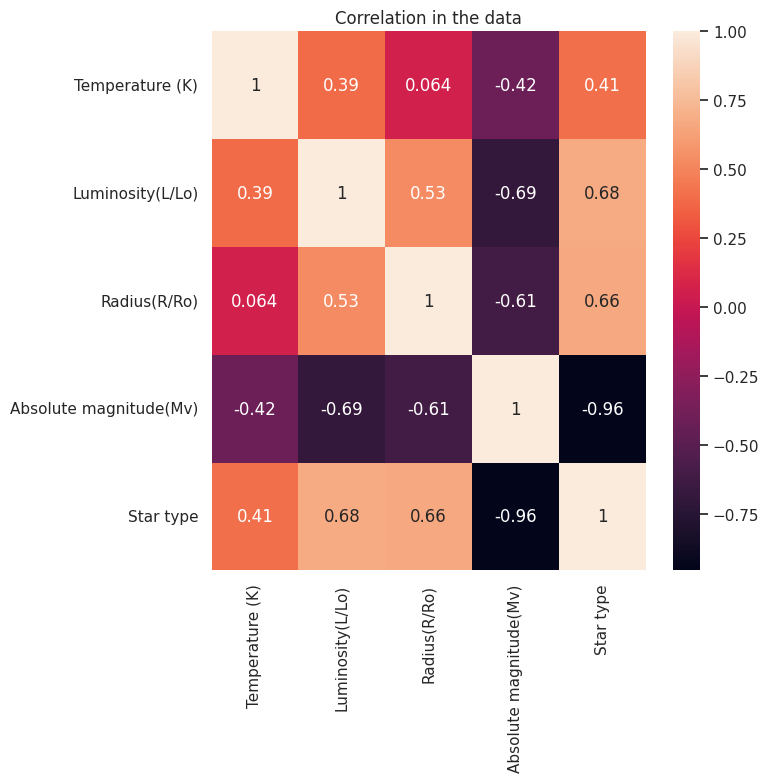

In [101]:
# Plotting a heatmap graph
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation in the data')
plt.show()

# **Correlation Heatmap Analysis**

A potent visualisation method that is frequently used to investigate and comprehend the relationships between various variables in a dataset is the heatmap graph shown above. It is used in this instance to analyse the "star dataset" and identify correlations between various star-related attributes. Let's dissect this heatmap's elements and interpretation:

The degree and direction of the link between two attributes are depicted on the heatmap using colour. Understanding this mapping requires knowledge of the colour scale to the right of the graph. On a colour scale, cool colours (like blue) denote negative correlations while warm colours (like red) denote positive correlations.

Graph Interpretation:

Positive Correlation: Warm colours (like shades of red) running diagonally from the bottom-left to the top-right of the heatmap indicate a positive correlation between the qualities. For instance, the tendency is for both attributes to increase as one does. This suggests that in the context of stars, there is a link between these characteristics.

Negative Correlation: Cool colours, like tones of blue, can be seen along the diagonal, which denotes a negative connection. In this situation, one quality tends to rise as the other tends to fall. An inverse link between the qualities is implied by negative correlations.

No association: Cells that are white or very light in colour and have values that are close to zero indicate that there is little to no linear association between the qualities. One trait changes without significantly affecting the other.

Darker hues imply stronger connections between two traits, whether the correlation is favourable or negative. The association is stronger the darker the colour.










# **Checking multicollinearity in the dataset**

The heatmap annotations reveal a strong relationship between the Absolute Magnitude and Star Type values, with a correlation coefficient of -0.96.

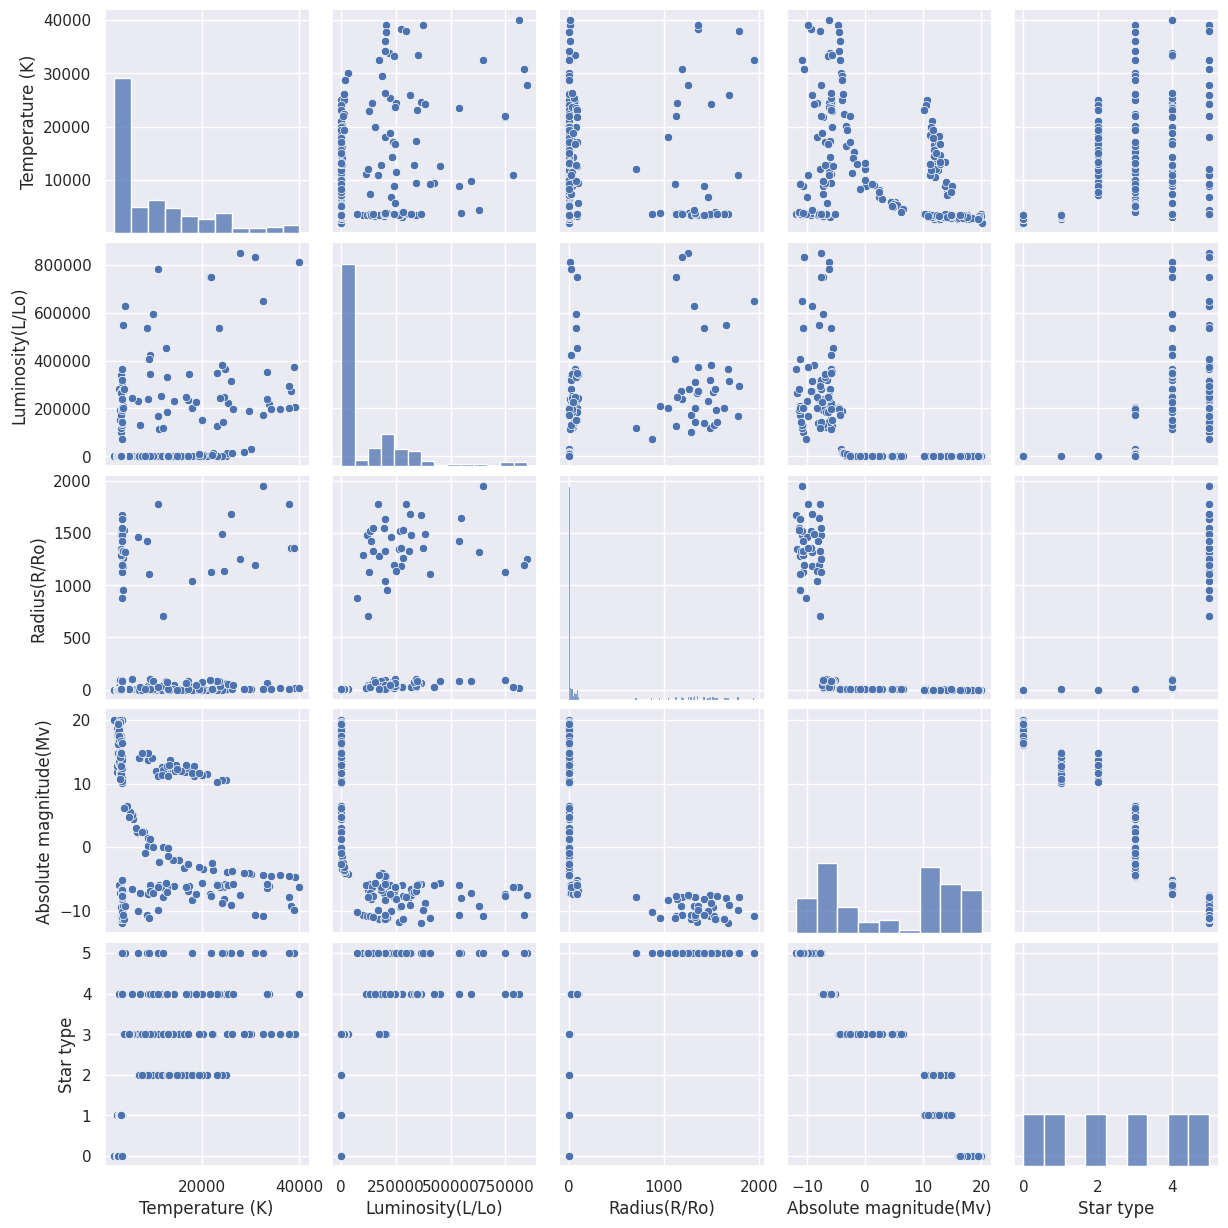

In [102]:
sns.pairplot(df)

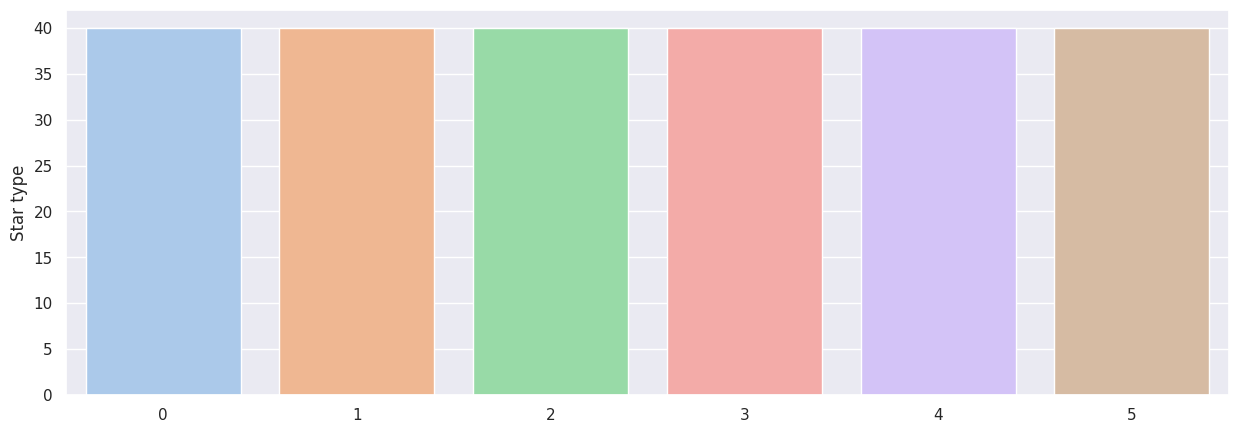

In [103]:
sns.set(style="darkgrid")
star_types = pd.DataFrame(df['Star type'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(15,5))
ax = sns.barplot(x = star_types.index, y = 'Star type' , data = star_types, palette='pastel')

# **Explaining the Above Graph**

Overall, the bar plot shows the frequency or count of each star type, which makes it simple to observe how the dataset's star kinds are distributed. Each bar represents a distinct star type, and its height shows how frequently that star type appears in the data.
Here:

All the star types are uniformly distributed and more or less are of the same count.

In [104]:
# Checking how many type of star colors are available in the dataset
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

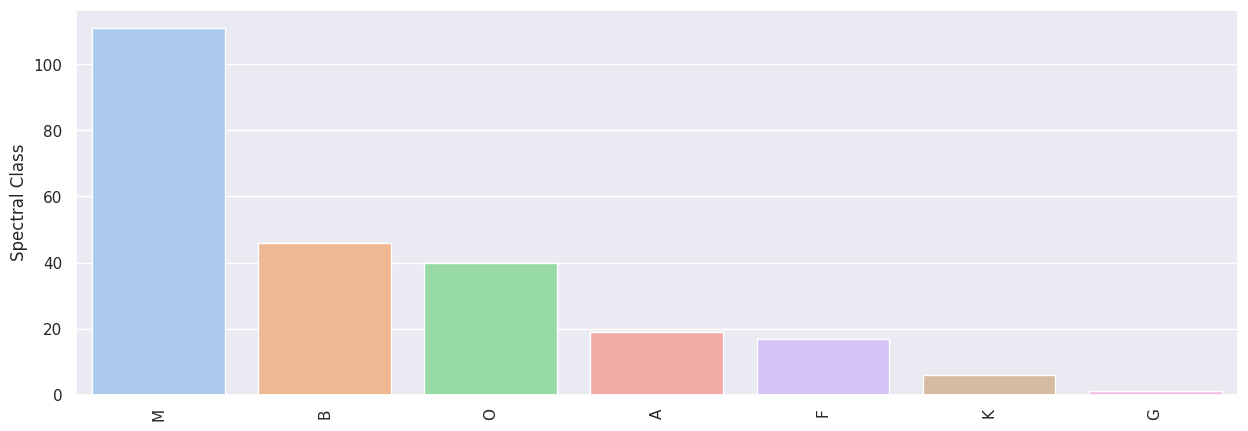

In [105]:
stars_spectral = pd.DataFrame(df['Spectral Class'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(15,5))
ax = sns.barplot(x = stars_spectral.index, y = 'Spectral Class' , data = stars_spectral, palette='pastel')
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# **Above Graph Interpretation**

Interpreting the Results: The resulting bar plot shows how the spectral classes are distributed across the dataset. The height of each bar, which represents a distinct spectral class, signifies the number or frequency of that spectral class in the dataset.

The height of each bar indicates the frequency with which each spectral class appears in the dataset. Shorter bars denote less prevalent spectral classes, while taller bars denote more prevalent spectral classes.

Comparison: You can immediately determine which spectral classes are more prevalent and which are less so by comparing the heights of the bars.

Communication: The spectral class distribution of the dataset can be understood using this visualisation. It can be used to convey to both technical and non-technical audiences the prevalence of certain types of stars.

Here, The distribution of spectral classes in the dataset is efficiently communicated by the bar plot, making it simpler to comprehend and evaluate the data's make-up.


In [106]:
# Converting categories into numbers
data = {
    'temperature': df['Temperature (K)'],
    'luminosity': df['Luminosity(L/Lo)'],
    'radius': df['Radius(R/Ro)'],
    'absolute_magnitude': df['Absolute magnitude(Mv)'],
    'star_type': df['Star type'],
    'star_color': df['Star color'],
    'spectral_class': df['Spectral Class']
}
data = pd.DataFrame.from_dict(data)

data['star_type'] = data['star_type'].astype('category').cat.codes
data['star_color'] = data['star_color'].astype('category').cat.codes
data['spectral_class'] = data['spectral_class'].astype('category').cat.codes

<ipython-input-107-a5b145f0bb7c>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-107-a5b145f0bb7c>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-107-a5b145f0bb7c>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

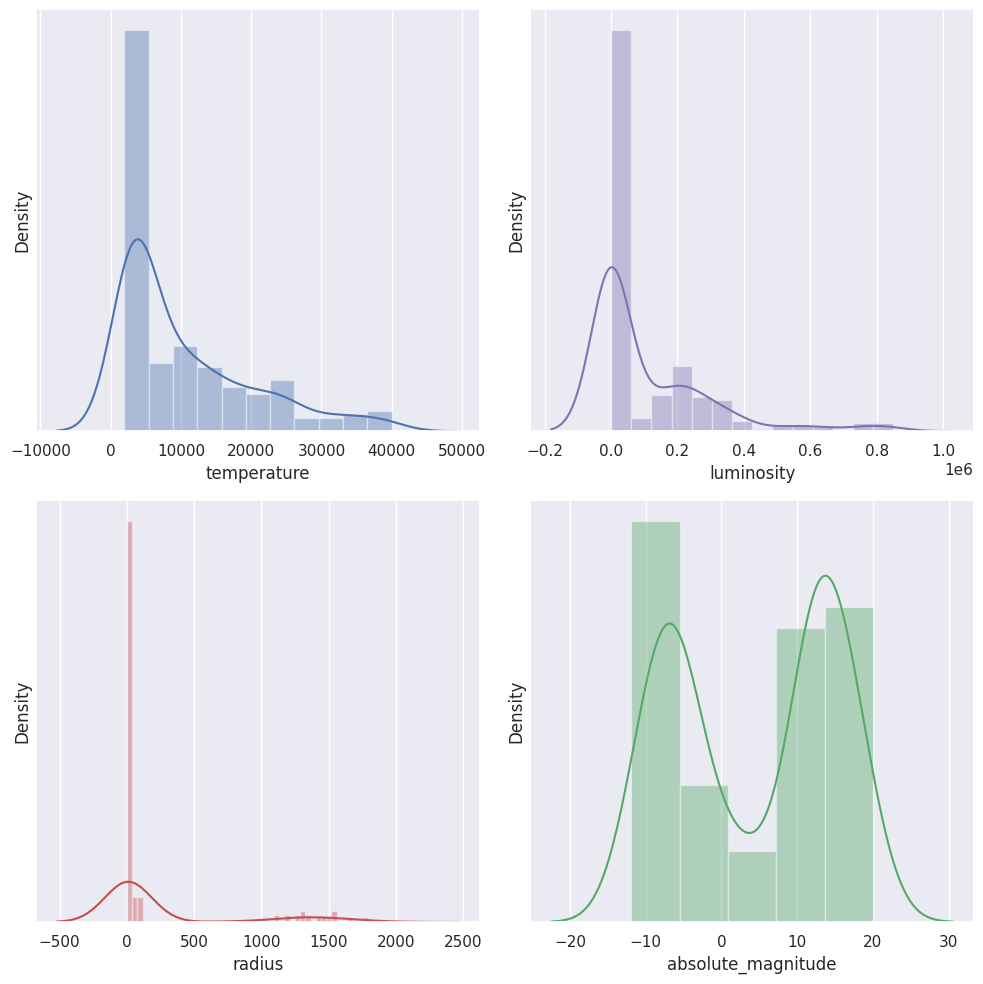

In [107]:
# Plotting distplots
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.despine(left=True)

sns.distplot(data['temperature'], color='b', ax=axes[0, 0])
sns.distplot(data['luminosity'], color='m', ax=axes[0, 1])
sns.distplot(data['radius'], color='r', ax=axes[1, 0])
sns.distplot(data['absolute_magnitude'], color='g', ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

# **Understanding the Findings:**

A visual representation of the distribution of a certain variable is offered by each distplot.
Each plot has a y-axis for the probability density and an x-axis for the values of the variables.
Each distplot has a colour that relates to the variable it depicts, such as magenta for luminosity and blue for temperature.
Each distribution plot's shape reveals details about the properties of the data.

For instance:


Distribution of temperature: Most of the data points in the blue distplot have comparable temperatures, which is an indication of a unimodal distribution.


The magenta scatterplot appears to be right-skewed, indicating that the distribution of luminosity values may have a lengthy tail of higher values.

Radius Distribution: The red scatterplot shows a comparatively balanced distribution of radius values and is fairly symmetrical.

Absolute Magnitude Distribution: A unimodal distribution with some dispersion can be seen in the green scatterplot.

These distribution charts help with data exploration and analysis by providing an insight of the central tendency, spreads, and skewness of the data for each of the four variables.



In [108]:
import plotly.express as px

fig = px.scatter(df, x="Temperature (K)", y="Luminosity(L/Lo)", size="Radius(R/Ro)", color="Star color",
           hover_name="Star type", log_x=True, size_max=60)
fig.show()

# **Understanding the Above Findings:**

For several star types, the scatter figure illustrates the correlations between temperature, brightness, radius, and star colour.

The x-axis and y-axis positions of each data point on the plot correspond to the temperature (x-axis) and brightness (y-axis) of the star that it represents.

The markers' sizes correspond to the stars' radii; larger markers denote larger radii.

Data points are coloured according to the star's colour, making it simple to distinguish between stars of various colours.

When you mouse over a data point, further details about the star type are displayed.

The correlations between various star attributes and their classifications can be explored with the help of this interactive scatter plot's rich visualisation.

Users are able to engage with the data to obtain new perspectives and spot trends.

<ipython-input-109-3cd3b570ecb3>:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



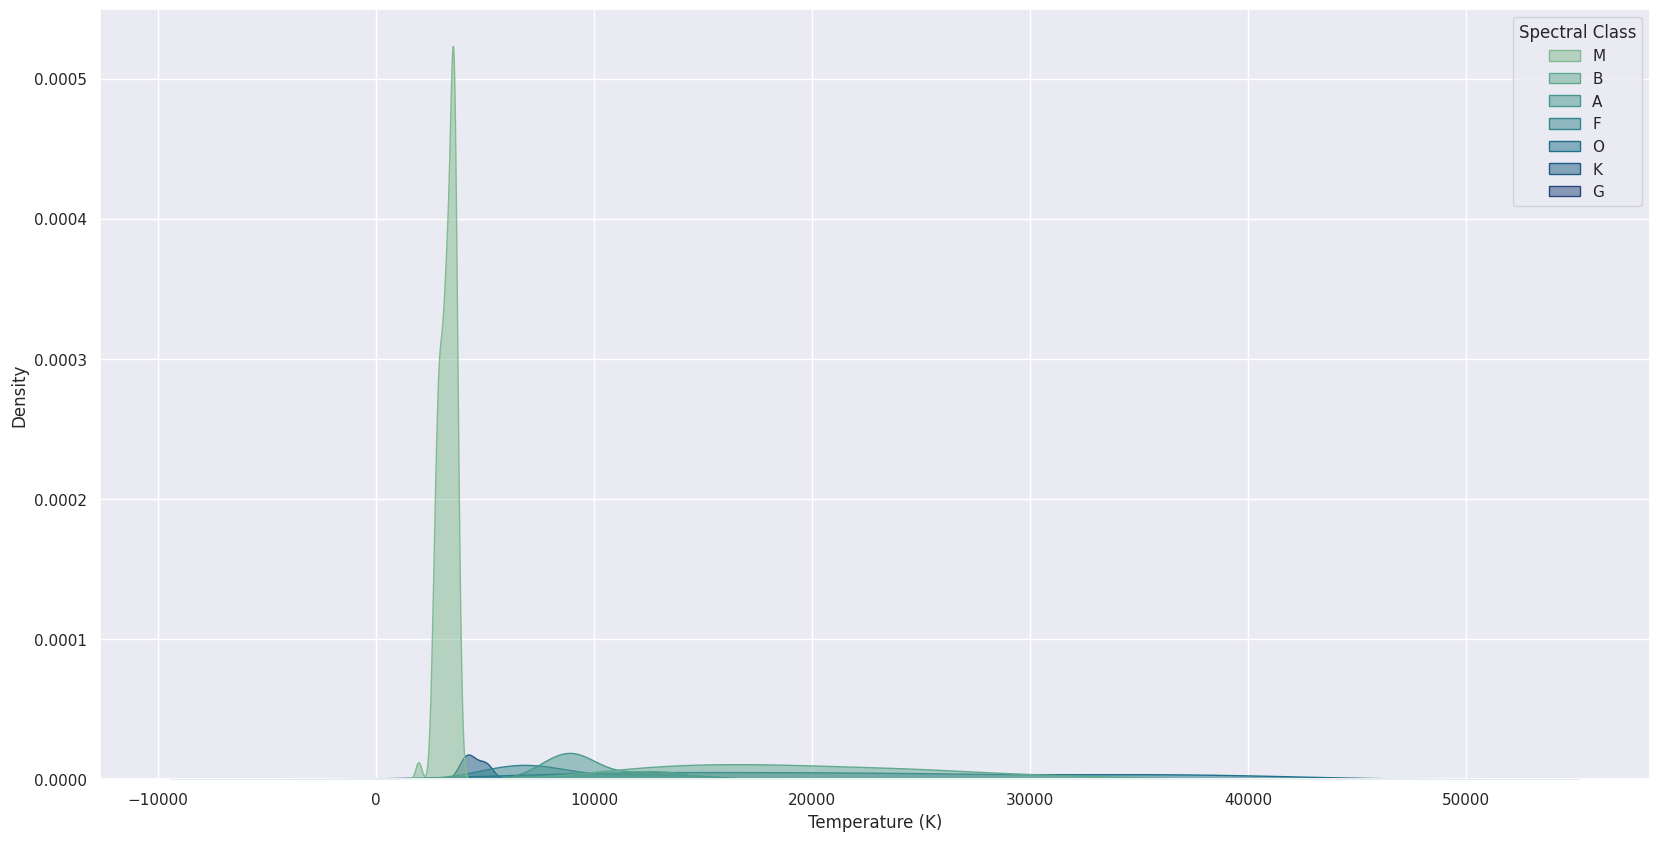

<ipython-input-109-3cd3b570ecb3>:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



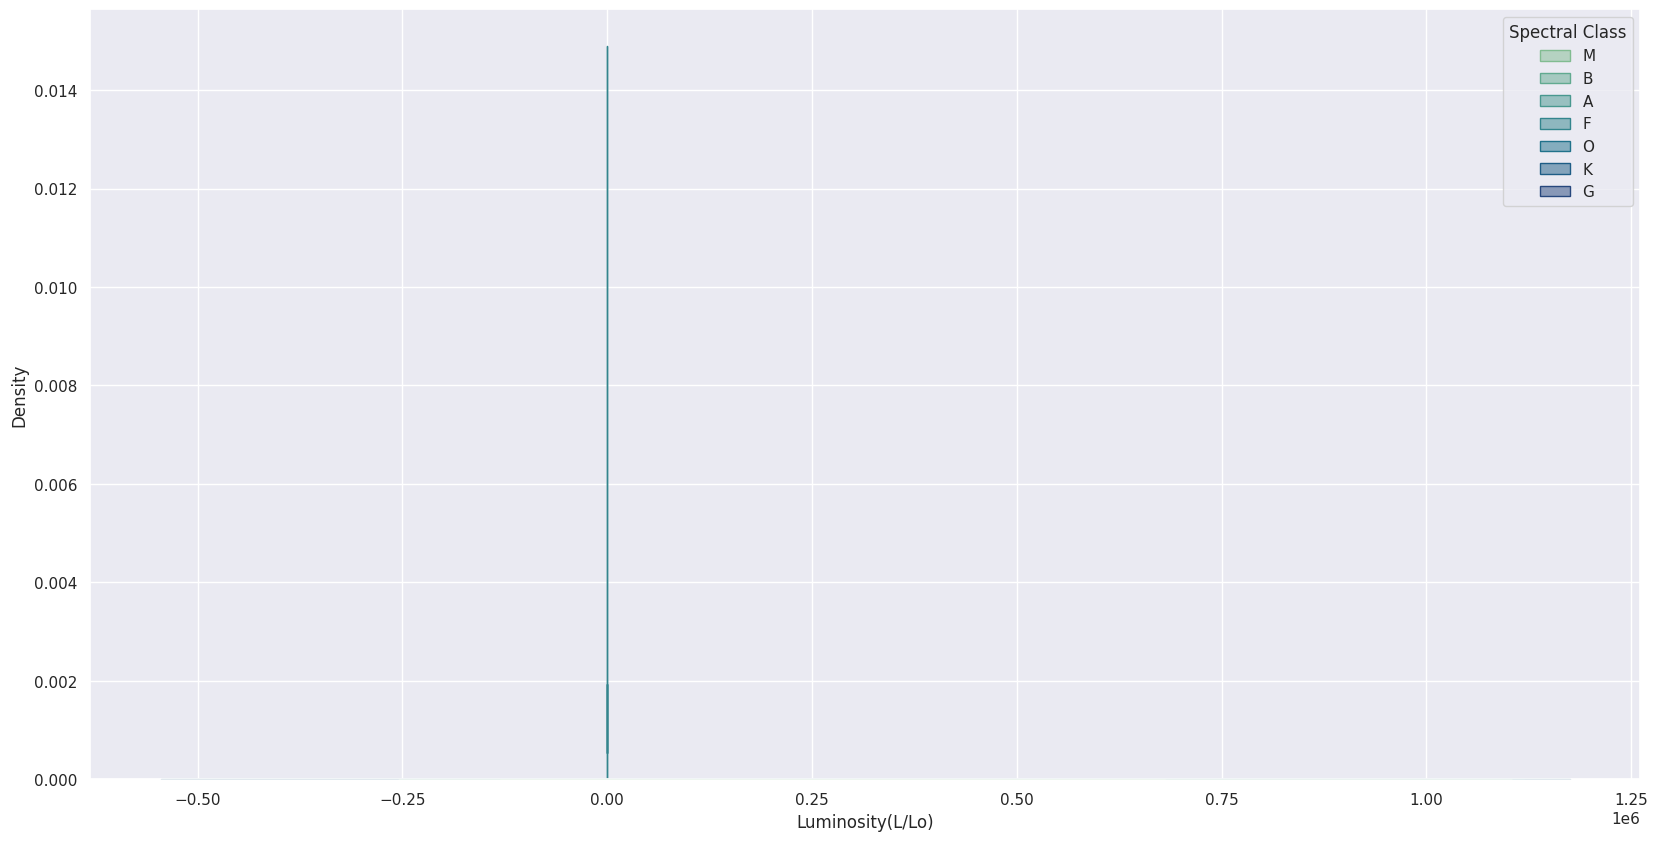

<ipython-input-109-3cd3b570ecb3>:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



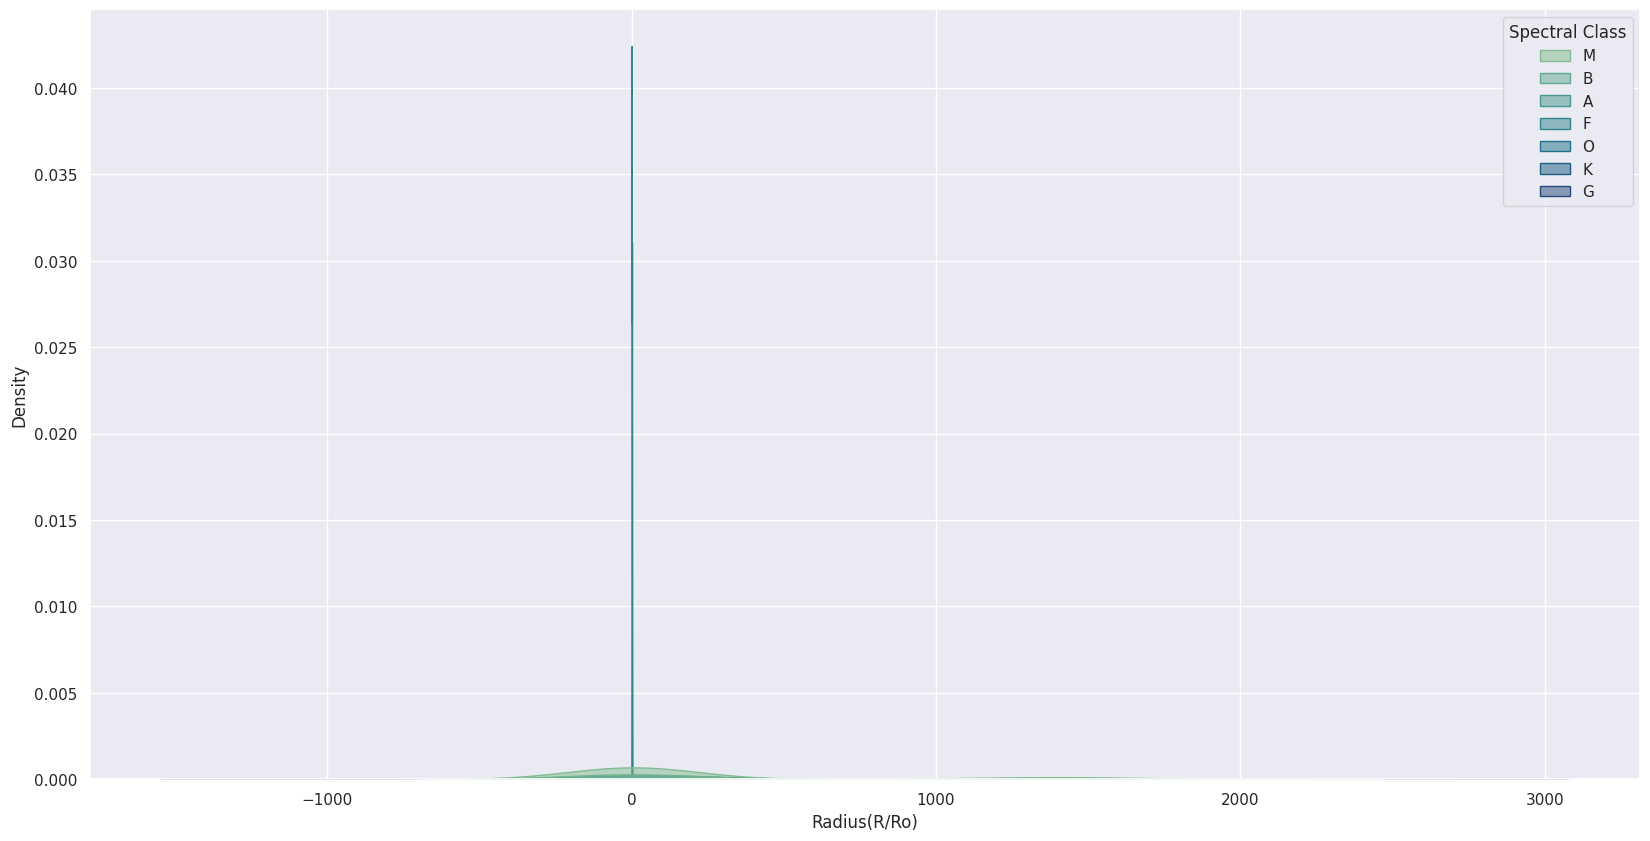

<ipython-input-109-3cd3b570ecb3>:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



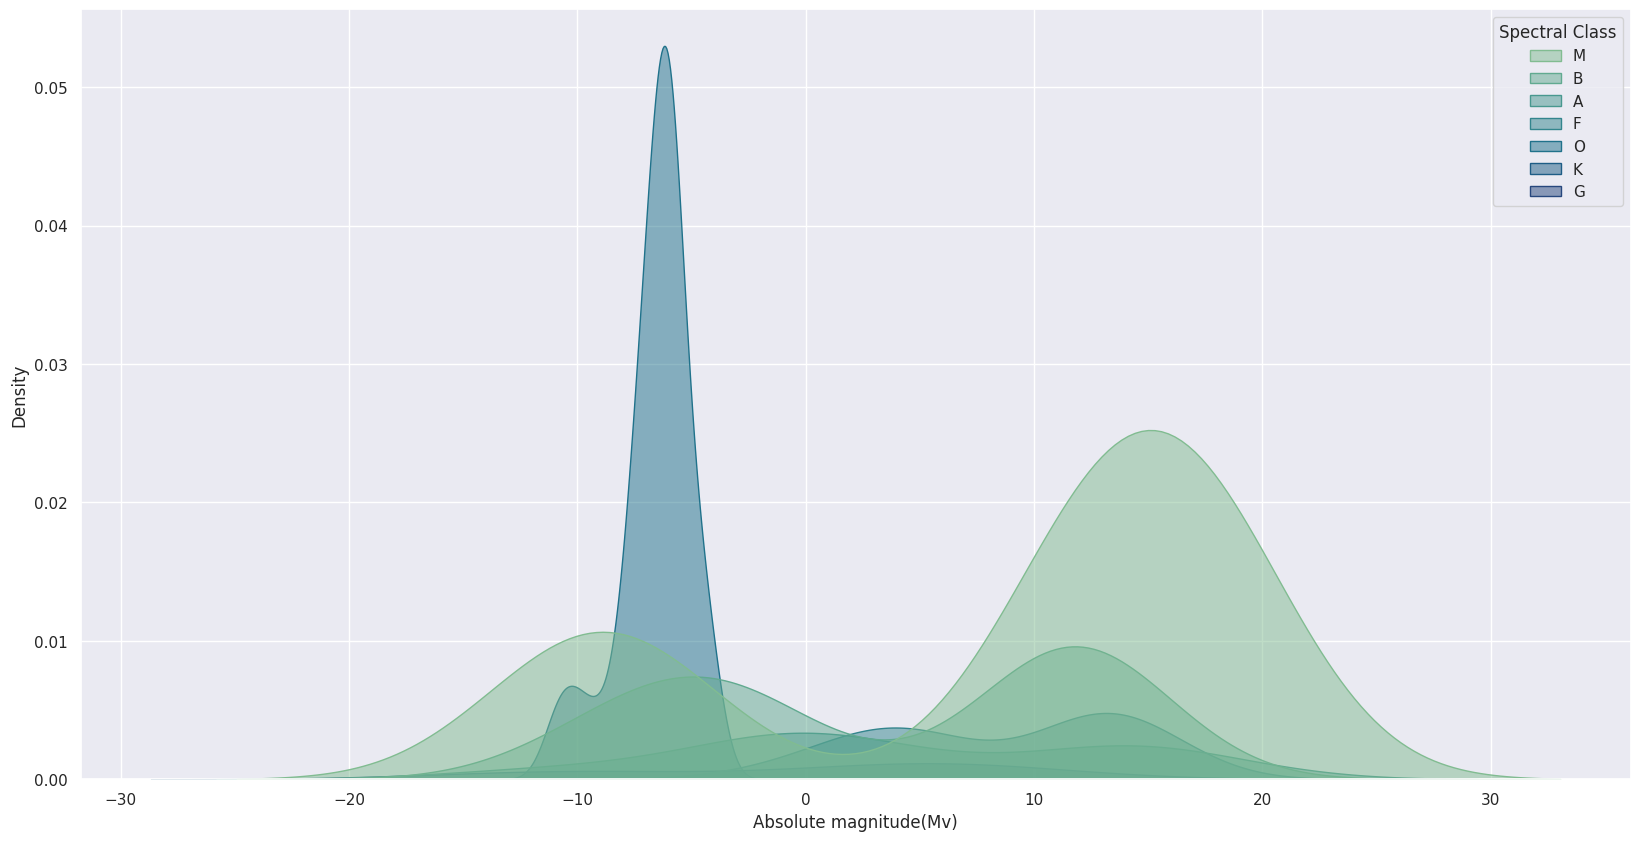

<ipython-input-109-3cd3b570ecb3>:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



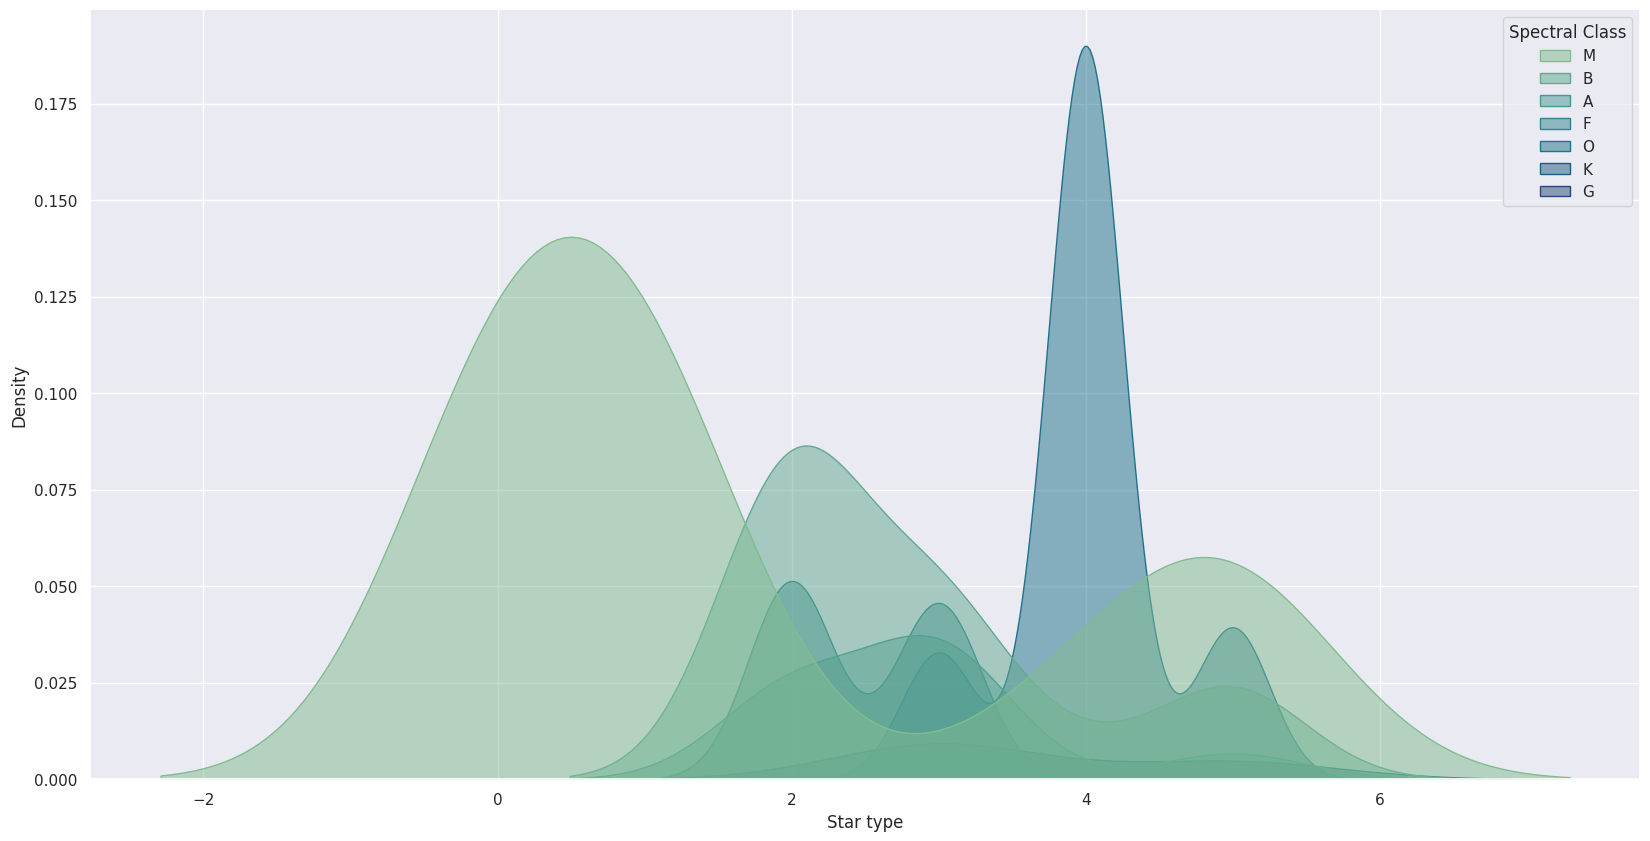

In [109]:
for column in df:
    if column != 'Spectral Class' and df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(20,10))
        sns.kdeplot(data=df, x=column, hue='Spectral Class', fill=True, alpha=0.5, palette="crest")
        plt.show()

# **Understanding the Findings:**

The KDE graphs, each of which displays the distribution of a different numerical value.

Each plot's x-axis displays the values of the chosen numerical variable.

The data distribution's estimated density is represented on the y-axis, which displays how values are distributed or are concentrated.

You can see how the distributions of numerical attributes differ across several classes of stars by differentiating the KDE plots by 'Spectral Class' using various colours. Depending on the spectral class of the stars, this can help you spot any trends or variations in the data.

It's a helpful technique to investigate the connections between spectral categorization and star characteristics.

* Star Type and Density shows KDE plots with reasonable values
* Absolute Magnitude and Density shows KDE plots with reasonable values


In [110]:
# Defining X and y variables
X = data.drop('star_type', axis=1)
y = data['star_type']

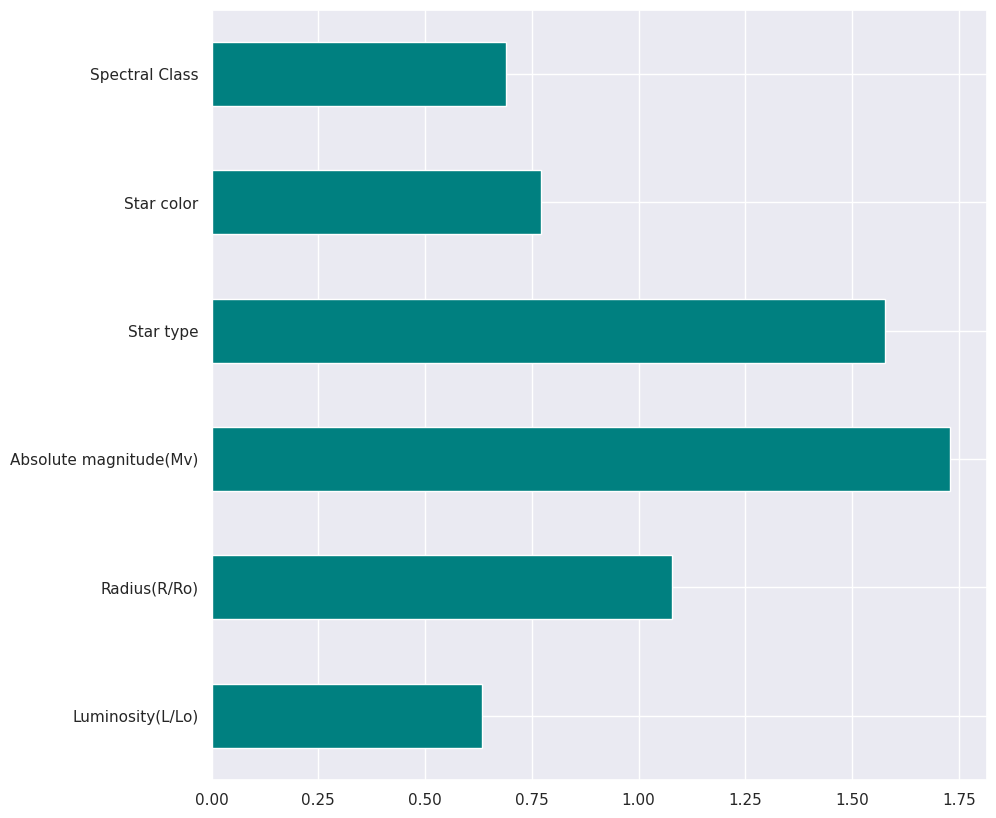

In [111]:
# Feature importance
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, df.columns[1:12])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

Based on the presented plot, it becomes evident that the absolute magnitude feature holds significant importance in predicting the star type.

In [112]:
# Training the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Logistic Regression**

In [113]:
# Importing required libraries
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [114]:
# Fitting the model
reg = LogisticRegression()
reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [115]:
# Make predictions using the training set
y_pred = reg.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on training set =',r2)
acc = accuracy_score(y_test,y_pred)
print('Accuracy score =',acc)
print('Confusion Matrix:', confusion_matrix(y_test,y_pred))

Mean squared error: 0.19
Coefficient of determination: 0.94
R^2 score on training set = 0.9415268002165674
Accuracy score = 0.8125
Confusion Matrix: [[ 8  0  0  0  0  0]
 [ 5  2  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  3  4  1  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.29      0.44         7
           2       0.67      1.00      0.80         6
           3       1.00      0.50      0.67         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.81        48
   macro avg       0.86      0.80      0.77        48
weighted avg       0.88      0.81      0.79        48



# **Logistic Regression Summary:**

Overall, the analysis shows that the logistic model's effectiveness differs depending on the type of star. For some star kinds, such as Star kinds 0, 2, 4, and 5, it works well. For other star types, such as Star Types 1 and 3, it works less well. Although overall performance appears to be adequate based on the weighted average F1-score of 0.79, there is potential for improvement, especially for classes with poorer precision and recall. The model may need to be tweaked and further examined to improve its performance for particular star types.

# **Using Random Forest algorithm to check if it can perform better than Logistic Regression**

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf_classifier.predict(X_test)
rf_pred

array([2, 0, 3, 4, 4, 5, 5, 2, 0, 2, 4, 2, 5, 4, 5, 5, 0, 1, 3, 0, 0, 1,
       5, 3, 5, 3, 1, 2, 5, 3, 3, 4, 2, 0, 1, 0, 1, 5, 1, 5, 4, 5, 4, 1,
       3, 0, 4, 3], dtype=int8)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[ 8  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


In [119]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



# **Random Forest Classifier Summary:**

As a whole, the study shows that for every type of star, the classification model had flawless precision, recall, and F1-score. It classified every incident in the dataset accurately, yielding a perfect accuracy of 1.00. The performance of this model seems to be very good, and it can predict accurately while reliably differentiating between different star kinds.


# **Conclusion**

The star dataset is a useful tool for astronomical study and data analysis since it provides a thorough collection of information on numerous stellar attributes. This dataset can be used by experts and amateurs alike to find trends, correlations, and new information about the nature of stars. This dataset is an essential resource for comprehending the universe beyond our planet, whether it be for educational objectives, academic research, or data analysis tasks.

As a result, data visualisation is a potent tool for comprehending the complexity of star data and successfully conveying these insights. The star dataset is a useful tool for both scientists and educators since it fills the gap between unprocessed data and insightful conclusions.

**Model Comparison:**

Random Forest model outperforms Logistic Regression Model, and performs extremely well and predicts star types accurately

# **Reference**

Image: https://cdn.mos.cms.futurecdn.net/ApcuFeebra9um9oUmbTquD-1920-80.jpg.webp

Notebooks:

1. https://www.kaggle.com/code/ptfrwrd/visualization-classification-exploring-features
2. https://colab.research.google.com/drive/1jBok5HL7GcgrZ7M70T9ItcP-CyO1PjVt#scrollTo=AJOvDKWRydjP
3. https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/blob/main/Understanding_Data/Notebooks_Understanding_Data/Feature%20engineering_PCA.ipynb

# **License**

Copyright (c) 2023 Shreyas Dasari

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.